# Customer Segmentation Using K Means Clustering

### Importing the Dependencies

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

### Data Collection

In [6]:
customers=pd.read_csv(r'C:\Users\siddhant\Downloads\Mall_Customers.csv')

In [7]:
customers.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
customers.shape

(200, 5)

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# checking null values
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
# checking duplicate values
customers.duplicated().sum()

0

In [13]:
# Dropping columns customerid, age , gender as there are not necessary for this algorithm
customers.drop({'CustomerID','Age','Gender'},axis=1,inplace=True)


In [14]:
customers

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [15]:
data=customers.iloc[:,[0,1]].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Finding the no. of clusters 

In [16]:
#finding wcss value for different no. of clusters

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)

    wcss.append(kmeans.inertia_)
    

## Ploting An Elbow Graph

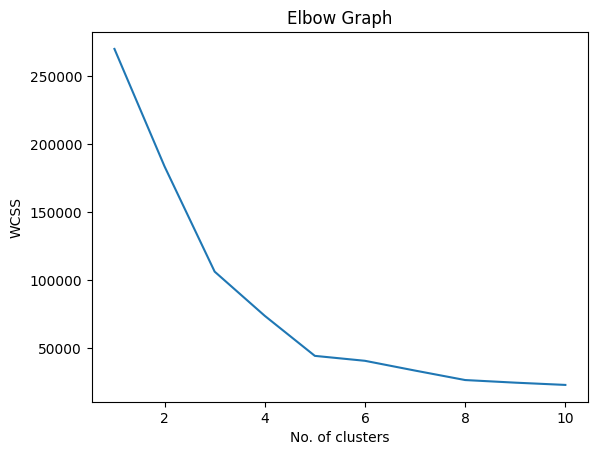

In [17]:

plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

## Optimum No. Of Clusters is 5

## Training the model

In [18]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

# return label for each data point based on cluster
y=kmeans.fit_predict(data)
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

## Ploting the clusters 

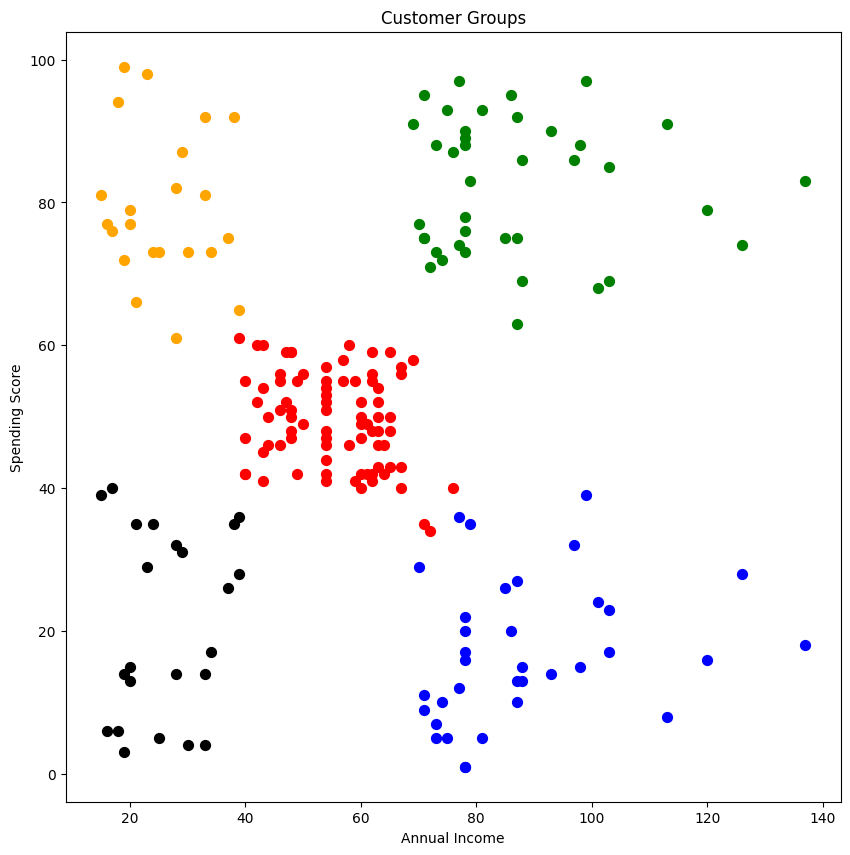

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(data[y==0,0],data[y==0,1],s=50,c='red',label='cluster 1')
plt.scatter(data[y==1,0],data[y==1,1],s=50,c='green',label='cluster 2')
plt.scatter(data[y==2,0],data[y==2,1],s=50,c='blue',label='cluster 3')
plt.scatter(data[y==3,0],data[y==3,1],s=50,c='black',label='cluster 4')
plt.scatter(data[y==4,0],data[y==4,1],s=50,c='orange',label='cluster 5')



plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


## Evaluating model using silhouette score 

In [20]:
score=silhouette_score(data,kmeans.labels_)
print("Silhouette Score :",score)

Silhouette Score : 0.553931997444648


## Evaluating inertia value 

In [21]:
print(" Inertia (WCSS):", kmeans.inertia_)

 Inertia (WCSS): 44448.4554479337


## Business Insights And Recommendations

  **Cluster 1 ( Green, High Income High Spending Score)**

  Insight : These are our loyal and premium customers

  Recommendations : 
  Upsell Premium luxury products
  Provide personalised services or early access to new items
  focus retention strategies here ( loyalty programs, exclusive discounts)

  **Cluster 2 (Blue, High Income Low Spending Score)**

  Insight : These customers have money but dont spend much - potential untapped value

  Recommendations :
  Launch targeted marketing campaigns (email, social media) to increase engagement.
  Investigate if there's a product mismatch or customer dissatisfaction.

  **Cluster 3 ( Red,Average Income, Average Spending)**

  Insight : This is the mainstream segment, steady but not highly profitable.

  Recommendations : 
  Use combo offers, loyalty rewards, and cashback to slowly increase spending.
  Great group for testing new marketing strategies or product launches.

  **Cluster 4 ( Orange, Low Income High Spending )**

  Insight : These are value-driven or aspirational buyers — they spend a lot relative to their income.

  Recommendations : 
  Focus on affordable luxury or EMI-based options.
  Watch for default risk if extending credit-based services.

  **Cluster 5 ( Black , Low Income Low Spending)**

  Insight : Least profitable group, possibly bargain seekers or less engaged customers.

  Recommendations : 
  Minimize acquisition cost for this segment.
  Offer budget-friendly products and bulk deals.
  Consider deprioritizing heavy marketing to them unless aligned with brand goals
  